### MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


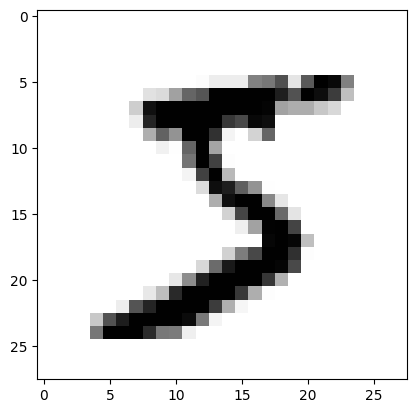

In [6]:
digit = X[0] # to_numpy[0] permite convertir a array de numpy la fila 0
digit_image = digit.reshape(28, 28)
# mostrar la imagen
plt.imshow(digit_image, cmap='binary') # imshow muestra la imagen
plt.show()

In [7]:
# para confirmar que es un 5
y = y.astype(np.uint8) # convertir a entero
y[0]

np.uint8(5)

In [8]:
# dividiendo el conjunyo de datos para el entrenamiento
X_train, Xtest, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# entrenando un clasificador binario
y_train_5 = (y_train == 5) # vector booleanoyY_test_5 = (y_test == 5)

In [9]:
# algoritmo de SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [10]:
sgd_classifier.predict([X[0]])

array([ True])

### RENDIMIENTO DEL MODELO

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

## MATRIZ DE CONFUSIÓN

## | TN | FP |
## | FN | TP | 

### TN = TrueNegative. valores que el algoritmo dijo que no eran el numero y estaba en lo correcto

### FP = FalsePositive. valores que el algoritmo dijo que eran el numero y se equivocó

### FN = FalseNegative. valores que el algoritmo dijo que NO eran el numero y se equivocó

### TP = TruePositive. valores que el algoritmo dijo que eran el numero y estaba en lo correcto

In [12]:
# Predicciones
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [14]:
 
# PRECISIÓN.### TP / (TP + FP)
precision = 53892 / (53892 + 687)

# RECALL (SENSIBILIDAD)### TP / (TP + FN)
recall = 53892 / (53892 + 1891)

print(f'precision: {precision}\n recall: {recall}')

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))



precision: 0.987412741164184
 recall: 0.9661007833927899
0.8370879772350012
0.6511713705958311


In [15]:
# F1 score permite tener una métrica que combine precisión y recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### REGRESIÓN LOGÍSTICA

In [16]:
# set de datos
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\ander\Escritorio\PYTHON\Python 2025\machine_learning\datasets\Social_Network.csv',sep=',', encoding='utf-8')
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [17]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [37]:
# variables independeintes
X = df.iloc[:,[2,3]]
# variable dependiente
y = df.iloc[:,-1].values
print(X)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [51]:
gender = df[['Gender']]

In [52]:
gender

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [56]:
# Transformando columna gender categorica a numerica
from sklearn.preprocessing import OneHotEncoder
import numpy as np
cat_encoded = OneHotEncoder()
df_cat_onehot = cat_encoded.fit_transform(gender)


In [57]:
# mmostrar categorias
cat_encoded.categories_

[array(['Female', 'Male'], dtype=object)]

In [60]:
df_cat_onehot.toarray()[:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [62]:
# transformando en un solo dataframe
df_encoded = pd.DataFrame(df_cat_onehot.toarray(), columns = cat_encoded.get_feature_names_out())
df_encoded.head()

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [64]:
# Juntando en el dataframe de X
df_final = pd.concat([df_encoded,X], axis = 1)
df_final.head()

,Gender_Female,Gender_Male,Age,EstimatedSalary
0,0.0,1.0,19,19000
1,0.0,1.0,35,20000
2,1.0,0.0,26,43000
3,1.0,0.0,27,57000
4,0.0,1.0,19,76000


In [65]:
df_final.shape

(400, 4)

In [66]:
# dividir el conjunto en testing y entrenamiento
from sklearn.model_selection import train_test_split
# conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(df_final,y, test_size=0.2, random_state=0)


In [67]:
#dimensiones
print(X_train.shape)
print(X_test.shape)

(320, 4)
(80, 4)


### ESCALADO DE VARIABLES

In [68]:
# escalado en variables independientes
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [69]:
# entrenamiento con regresion logistica
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
# prediccion
y_pred = log_reg.predict(X_test)

In [73]:
# que tan bueno es
print(f'Reales: {y_test[:10]}\n Predicción: {y_pred[:10]}')

Reales: [0 0 0 0 0 0 0 1 0 0]
 Predicción: [0 0 0 0 0 0 0 1 0 1]


In [74]:
# matrix de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[56,  2],
       [ 5, 17]])

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'''
    Presición: {precision_score(y_test,y_pred)}'\n 
    Memoria: {recall_score(y_test, y_pred)}\n
    f1_score: {f1_score(y_test, y_pred)}
      
      ''')


    Presición: 0.8947368421052632'
 
    Memoria: 0.7727272727272727

    f1_score: 0.8292682926829268

      


### K-NN
Ecuaciones utilizadas en Los vecinos mas cercanos: 
- Euclidiana
- Manhattan
- Minkowski

Recomendacion: utilizar en conjunto de datos pequeños

In [87]:
# carga de datos
data = pd.read_csv(r'C:\Users\ander\Escritorio\PYTHON\Python 2025\machine_learning\datasets\Social_Network.csv',sep=',', encoding='utf-8')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [88]:
X = data.iloc[:, [2,3]]
y = data.iloc[:,-1].values

In [91]:
gender = data[['Gender']]
# transformando a su parte numerica
cat_encoder = OneHotEncoder()
data_cat_onehot = cat_encoder.fit_transform(gender)


In [92]:
# creando un solo df
df_encoder = pd.DataFrame(data_cat_onehot.toarray(), columns = cat_encoder.get_feature_names_out())
df_encoder.head( )

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [93]:
df_completo = pd.concat([df_encoder, X], axis = 1)
df_completo.head()

,Gender_Female,Gender_Male,Age,EstimatedSalary
0,0.0,1.0,19,19000
1,0.0,1.0,35,20000
2,1.0,0.0,26,43000
3,1.0,0.0,27,57000
4,0.0,1.0,19,76000


In [94]:
# entrenando al modelo
X_train, x_test, y_train, y_test = train_test_split(df_completo, y, test_size=0.2, random_state=0)

In [ ]:
# transformando variables
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(x_test)

In [96]:
# K vecinos mas cercanos
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1) # p = 1 es para la distancia de manhattan
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [97]:
y_pred = knn.predict(X_test)
print(f'Reales: {y_test[:10]}\n Predicción: {y_pred[:10]}')

Reales: [0 0 0 0 0 0 0 1 0 0]
 Predicción: [0 0 0 0 0 0 0 1 0 1]


In [98]:
# matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[55,  3],
       [ 1, 21]])

In [100]:
# calculo de la memoria y presición
from sklearn.metrics import precision_score, recall_score, f1_score 
print(f'''
        Presicion: {precision_score(y_test,y_pred)}\n
        Memoria: {recall_score(y_test,y_pred)} \n
        f1_score: {f1_score(y_test, y_pred)} 
      ''')


        Presicion: 0.875

        Memoria: 0.9545454545454546 

        f1_score: 0.9130434782608695 
      
